# Loading Libraries and Datasets

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.impute import KNNImputer
import nltk
import collections
import missingno as msno

import pickle

In [2]:
raw_data1 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults.csv')
raw_data2 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults1.csv')
raw_data3 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults2.csv')
raw_data4 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults3.csv')
raw_data5 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults4.csv')
raw_data6 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults5.csv')
raw_data7 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults6.csv')
raw_data8 = pd.read_csv('C:\Ali\Formaton machine learning\QueryResults7.csv')
raw_data = pd.concat([raw_data1, raw_data2,raw_data3,raw_data4,raw_data5,raw_data6,raw_data7,raw_data8], axis=0)


# Data exploring 

In [3]:
raw_data.shape

(385725, 23)

In [4]:
raw_data.describe()
raw_data.drop_duplicates()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion><railo><cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model-view-controller><validation><forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c++><c><visual-studio><memory-leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective-c><string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective-c>,4,1,29,NaN,NaN,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30564462,1,30564841.0,NaN,2015-06-01 01:25:11,NaN,3,52464,<p>I need some help:\nI'm making a Supermarket...,4701913.0,...,NaN,2020-01-13 10:17:02,Read data from a text file and create an object,<java><bufferedreader><readfile><stringtokeniz...,3,0,5,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,<javascript><css><angularjs><twitter-bootstrap...,1,0,1,NaN,NaN,CC BY-SA 3.0
49997,30564496,1,30564535.0,NaN,2015-06-01 01:31:17,NaN,2,698,"<p>I currently have two buttons on my screen ,...",990502.0,...,2018-07-09 10:18:02,2021-05-26 08:31:51,How to simulate simultaneous touch in iOS Simu...,<ios><ios-simulator>,2,0,1,NaN,NaN,CC BY-SA 4.0
49998,30566714,1,NaN,NaN,2015-06-01 06:10:56,NaN,4,4805,<p>I'm trying to load a YouTube video into a T...,2236885.0,...,2015-06-01 15:45:32,2015-06-02 07:30:11,How to embed YouTube videos in newer versions ...,<delphi><video><youtube><embed><delphi-xe7>,2,26,5,NaN,NaN,CC BY-SA 3.0


In [5]:
raw_data.describe()


,Id,PostTypeId,AcceptedAnswerId,ParentId,DeletionDate,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount
count,3.857250e+05,385725.0,2.898280e+05,0.0,0.0,385725.000000,3.857250e+05,3.740340e+05,2.403440e+05,385725.000000,385725.000000,385725.000000
mean,1.216945e+07,1.0,1.196165e+07,NaN,NaN,19.086624,2.008130e+04,1.050002e+06,1.106893e+06,3.329113,1.609074,6.684853
std,1.065917e+07,0.0,1.084189e+07,NaN,NaN,119.002830,8.719794e+04,1.256406e+06,1.644645e+06,3.863779,2.518843,53.116313
min,4.000000e+00,1.0,7.000000e+00,NaN,NaN,1.000000,1.100000e+01,1.000000e+00,-1.000000e+00,1.000000,0.000000,1.000000
25%,3.281524e+06,1.0,3.249673e+06,NaN,NaN,2.000000,1.280000e+03,1.244260e+05,5.515900e+04,1.000000,0.000000,1.000000
50%,9.132699e+06,1.0,8.948007e+06,NaN,NaN,4.000000,3.823000e+03,5.210700e+05,4.473560e+05,2.000000,1.000000,2.000000
75%,2.173782e+07,1.0,2.027872e+07,NaN,NaN,11.000000,1.250700e+04,1.481403e+06,1.437888e+06,4.000000,2.000000,4.000000
max,3.453912e+07,1.0,6.778515e+07,NaN,NaN,22731.000000,9.581521e+06,1.375309e+07,1.597400e+07,518.000000,58.000000,11119.000000


#### Les variables sont citées ci-dessous

In [6]:
i=0
for col in raw_data.columns:
    i=i+1
    print(i,col)
    

1 Id
2 PostTypeId
3 AcceptedAnswerId
4 ParentId
5 CreationDate
6 DeletionDate
7 Score
8 ViewCount
9 Body
10 OwnerUserId
11 OwnerDisplayName
12 LastEditorUserId
13 LastEditorDisplayName
14 LastEditDate
15 LastActivityDate
16 Title
17 Tags
18 AnswerCount
19 CommentCount
20 FavoriteCount
21 ClosedDate
22 CommunityOwnedDate
23 ContentLicense


<AxesSubplot:>

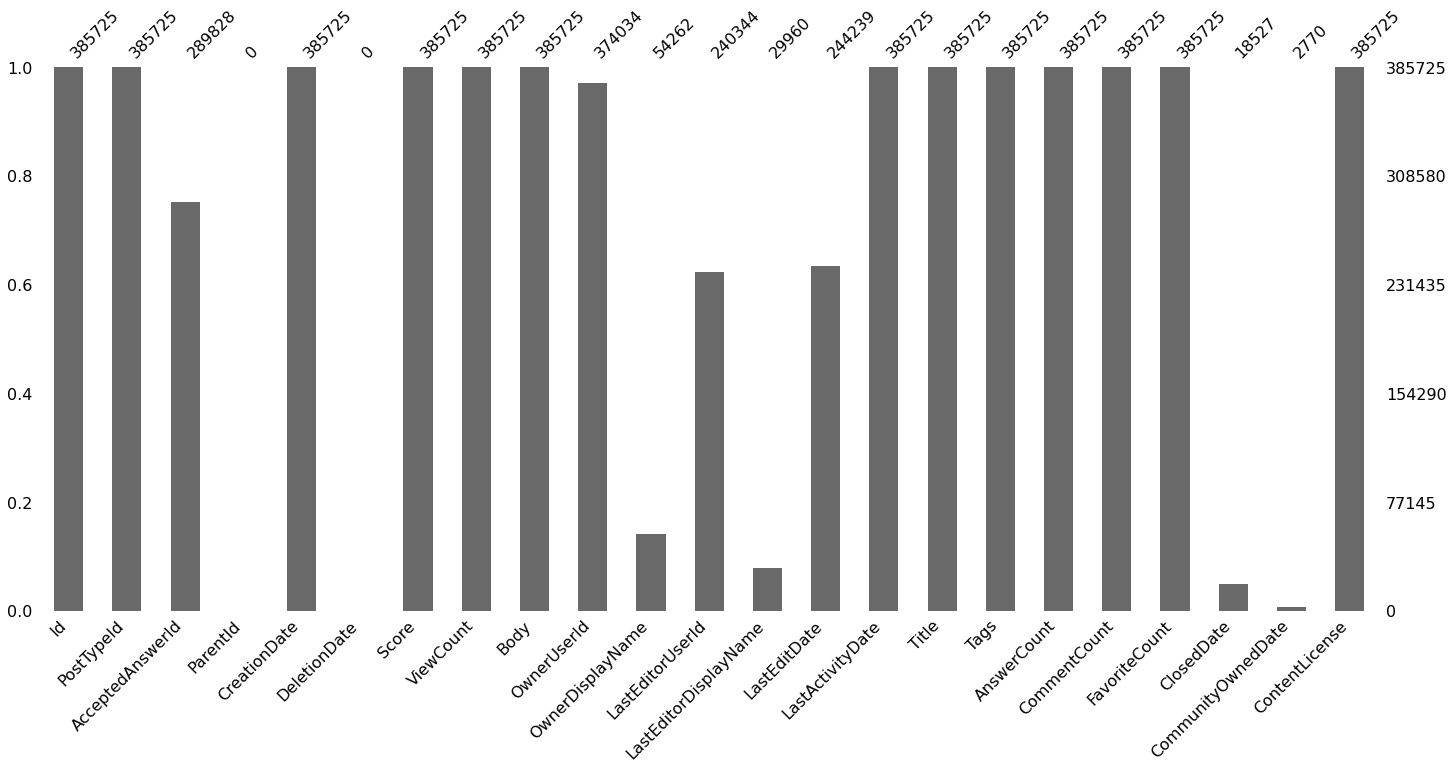

In [7]:
msno.bar(raw_data)

<AxesSubplot:>

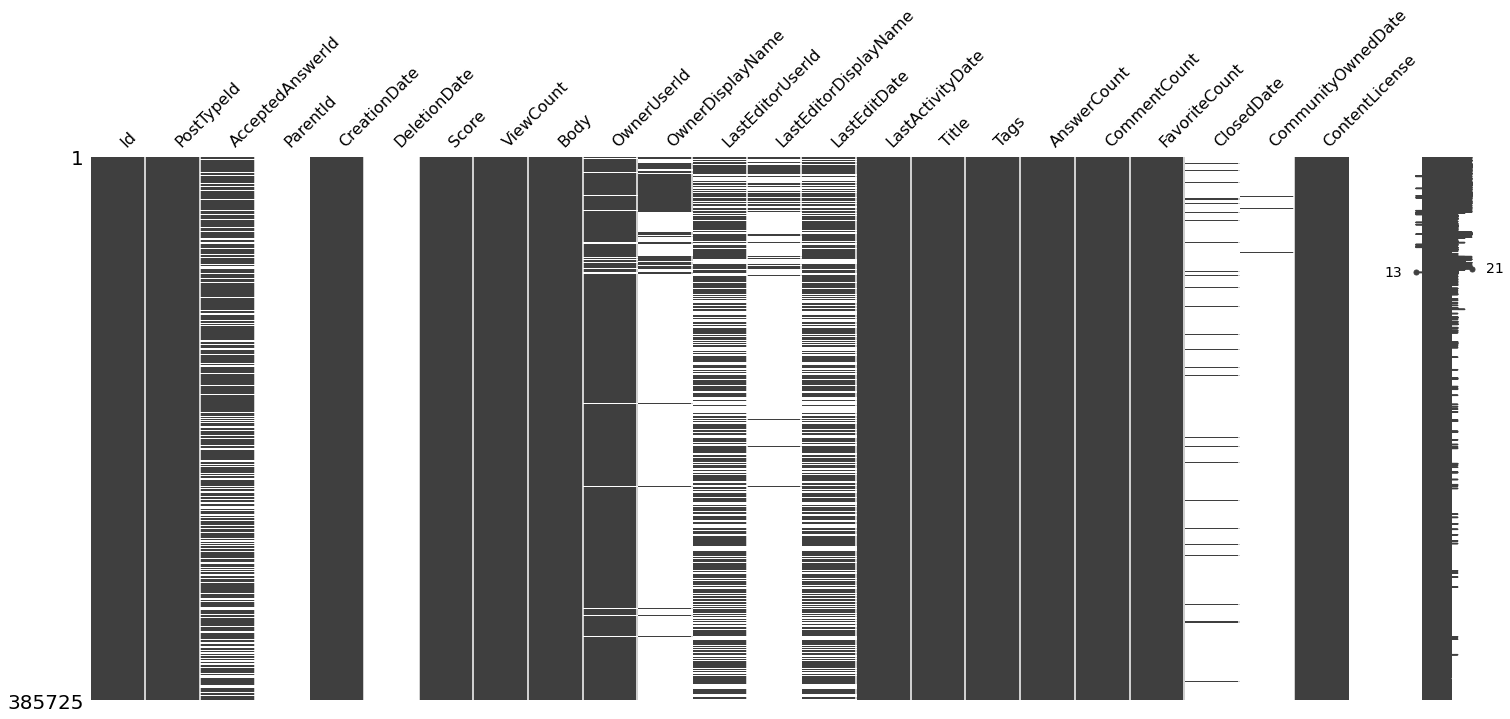

In [8]:
msno.matrix(raw_data)


#### les colonnes qui nous interessnet "Body" et "Tags" ne contiennent aucune valeur manquante. nous pouvons passer à l'étape duivante de nettoyage

# Data Cleaning :

## Prepreoccessing : Data cleaning 

#### Dans cette étape, nous commencer les premiere étape de preprocessing.

#### Cette partie consistera de nettoyer les donées des colonnes importantes Body & Tags pour qu'on puisses les exploiterlors de notre étude

### preprocessing de la colonne "Tags"

In [9]:
raw_data_copy = raw_data.copy()
raw_data_copy.head(5)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion><railo><cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model-view-controller><validation><forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c++><c><visual-studio><memory-leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective-c><string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective-c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [10]:
raw_data['Tags'] = raw_data['Tags'].str.replace("-","_")


raw_data.head(5)


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion><railo><cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model_view_controller><validation><forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c++><c><visual_studio><memory_leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective_c><string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective_c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [11]:
raw_data['Tags'] = raw_data['Tags'].str.replace("+","_plus")
raw_data.head(5)
# ajouter un underscore avant le "plus"


<ipython-input-11-afca7c0916de>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  raw_data['Tags'] = raw_data['Tags'].str.replace("+","_plus")


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion><railo><cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model_view_controller><validation><forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c_plus_plus><c><visual_studio><memory_leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective_c><string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective_c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [12]:
raw_data['Tags'] = raw_data['Tags'].str.replace("#","_sharp")
raw_data.head(5)


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion><railo><cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model_view_controller><validation><forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c_plus_plus><c><visual_studio><memory_leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective_c><string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective_c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [13]:
raw_data['Tags'] = raw_data['Tags'].str.replace("><", " ")
raw_data.head(5)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",<coldfusion railo cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,<model_view_controller validation forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,<c_plus_plus c visual_studio memory_leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,<objective_c string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,<objective_c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [14]:


raw_data['Tags'] = raw_data['Tags'].str.replace("<", "")
raw_data.head(5)



,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",coldfusion railo cfml>,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,model_view_controller validation forms>,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c_plus_plus c visual_studio memory_leaks>,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string>,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c>,4,1,29,NaN,NaN,CC BY-SA 2.5


In [15]:
raw_data['Tags'] = raw_data['Tags'].str.replace(">", "")
raw_data.head(5)


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",coldfusion railo cfml,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,model_view_controller validation forms,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c_plus_plus c visual_studio memory_leaks,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c,4,1,29,NaN,NaN,CC BY-SA 2.5


#### Nous avons nettoyé la colonne tags en enlevant tout ce qui peut gener au traitement qui seront effectués par la suite 

## Selecting most frequent tags 

### Tokenization et selection des tags les plus fréquents 

#### dans cette partie nous allons construire le dataset qui contiendra nos tags "cibles" les plus fréquent dans tout le dataset 

In [16]:
tags_datas = pd.DataFrame(raw_data['Tags'], columns = ['Tags'])
Id_datas = pd.DataFrame(raw_data['Id'], columns = ['Id'])

tags  = []
Id = []
s=""
for i in range( 0, raw_data.values.shape[0]):
    x=tags_datas.values[i,0].replace("><", " ")
    x=x.replace("<", "")
    x=x.replace(">", "")
    #x=x.replace(",", " ")
    tags.append(nltk.word_tokenize(x))
    Id.append(Id_datas.values[i,0])
    s=s+x

In [17]:
freqs = nltk.FreqDist(nltk.word_tokenize(s))
df = pd.DataFrame.from_dict(freqs, orient='index', columns = ['occurences'])
sorted_df = df.sort_values('occurences')
rare_tags = sorted_df[sorted_df['occurences']<1000]

In [18]:
rare_tags_df = pd.DataFrame(df.index, columns=['tags'])
occurences_df = pd.DataFrame(df.occurences.values, columns = ['occurences'])
rare_tags_df = pd.concat([rare_tags_df, occurences_df], axis = 1)
rare_tags_df = rare_tags_df.sort_values('occurences', ascending = False)


In [19]:
list_tags = rare_tags_df[rare_tags_df['occurences']>1000]
list_tags.values

array([['.net', 8152],
       ['jquery', 7232],
       ['html', 6411],
       ['objective_c', 4856],
       ['css', 4274],
       ['asp.net', 3863],
       ['android', 3299],
       ['mysql', 3168],
       ['ios', 3008],
       ['multithreading', 2771],
       ['sql_server', 2731],
       ['arrays', 2708],
       ['ruby', 2658],
       ['performance', 2506],
       ['asp.net_mvc', 2364],
       ['windows', 2300],
       ['string', 2299],
       ['json', 2291],
       ['xml', 2278],
       ['database', 2242],
       ['django', 2237],
       ['ajax', 2178],
       ['wpf', 2162],
       ['c', 2153],
       ['linux', 2100],
       ['xcode', 2085],
       ['sql', 2041],
       ['spring', 1889],
       ['winforms', 1824],
       ['eclipse', 1797],
       ['macos', 1729],
       ['unit_testing', 1658],
       ['swift', 1639],
       ['node.js', 1543],
       ['image', 1506],
       ['cocoa_touch', 1485],
       ['angularjs', 1476],
       ['algorithm', 1476],
       ['regex', 1462],
       ['

In [20]:
rare_tags_df=rare_tags_df[rare_tags_df['occurences']<1000]


In [21]:
raw_data 

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",coldfusion railo cfml,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,model_view_controller validation forms,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c_plus_plus c visual_studio memory_leaks,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c,4,1,29,NaN,NaN,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30564462,1,30564841.0,NaN,2015-06-01 01:25:11,NaN,3,52464,<p>I need some help:\nI'm making a Supermarket...,4701913.0,...,NaN,2020-01-13 10:17:02,Read data from a text file and create an object,java bufferedreader readfile stringtokenizer w...,3,0,5,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,javascript css angularjs twitter_bootstrap_3 a...,1,0,1,NaN,NaN,CC BY-SA 3.0
49997,30564496,1,30564535.0,NaN,2015-06-01 01:31:17,NaN,2,698,"<p>I currently have two buttons on my screen ,...",990502.0,...,2018-07-09 10:18:02,2021-05-26 08:31:51,How to simulate simultaneous touch in iOS Simu...,ios ios_simulator,2,0,1,NaN,NaN,CC BY-SA 4.0
49998,30566714,1,NaN,NaN,2015-06-01 06:10:56,NaN,4,4805,<p>I'm trying to load a YouTube video into a T...,2236885.0,...,2015-06-01 15:45:32,2015-06-02 07:30:11,How to embed YouTube videos in newer versions ...,delphi video youtube embed delphi_xe7,2,26,5,NaN,NaN,CC BY-SA 3.0


In [22]:
rare_tags_df = rare_tags_df.reset_index(drop = True)
rare_tags_df

,tags,occurences
0,user_interface,998
1,generics,995
2,qt,992
3,bash,986
4,forms,982
...,...,...
232390,fluent_nhibernateobjective_c,1
232391,core_plotsql,1
232392,bzip2jquery,1
232393,jquery_animatecmstest,1


In [23]:

list_tags_set = set(list_tags.tags)
list_tags_set

{'.net',
 'ajax',
 'algorithm',
 'android',
 'angularjs',
 'arrays',
 'asp.net',
 'asp.net_mvc',
 'c',
 'c_plus_plus11',
 'cocoa',
 'cocoa_touch',
 'css',
 'database',
 'debugging',
 'django',
 'eclipse',
 'entity_framework',
 'file',
 'hibernate',
 'html',
 'http',
 'image',
 'ios',
 'iphone',
 'javascript',
 'jquery',
 'json',
 'linq',
 'linux',
 'list',
 'macos',
 'multithreading',
 'mysql',
 'node.js',
 'objective_c',
 'oop',
 'oracle',
 'performance',
 'postgresql',
 'regex',
 'rest',
 'ruby',
 'ruby_on_rails_3',
 'security',
 'shell',
 'spring',
 'sql',
 'sql_server',
 'string',
 'swift',
 'swing',
 'templates',
 'unit_testing',
 'visual_studio',
 'web_services',
 'windows',
 'winforms',
 'wpf',
 'xcode',
 'xml'}

In [24]:
rare_tags_set = set(rare_tags_df.tags)


#### A la fin de cette partie nous sommes trouvé avec une liste cibles de 61 tags.
#### ces tags sont séléctionnés de la manière suivantes: pour qu'un tags soit séléctionné, il faut apparait dans le dataset au moins 1000 fois

### Data filtring 

#### Dans cette partie nous allons filtrer notre dataset en selectionnant les lignes qui contiennnet au moins un des tags cibles séléctionnées 

In [25]:
raw_data_copy2 = raw_data.copy()

In [26]:
raw_data = raw_data_copy2.copy()

In [27]:

raw_data['Tags'] = raw_data['Tags'].apply(lambda x: x.split())
raw_data.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?","[coldfusion, railo, cfml]",4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,"[model_view_controller, validation, forms]",4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,"[c_plus_plus, c, visual_studio, memory_leaks]",7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,"[objective_c, string]",3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,[objective_c],4,1,29,NaN,NaN,CC BY-SA 2.5


In [28]:
test = ['coldfusion', 'railo', 'cfml']

In [29]:
' '.join(test)

'coldfusion railo cfml'

In [30]:
raw_data_copy3 = raw_data.copy()
# comprehension de lists 
# apply

In [31]:
raw_data['Tags'] = raw_data['Tags'].apply(lambda x: [a for a in x if a in list_tags_set])
raw_data.head(5)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",[],4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,[],4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,"[c, visual_studio]",7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,"[objective_c, string]",3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,[objective_c],4,1,29,NaN,NaN,CC BY-SA 2.5


In [32]:
raw_data['Tags'].values
list([])

[]

In [33]:
raw_data_copy4 = raw_data.copy()

In [34]:
raw_data['Tags'] = raw_data['Tags'].apply(lambda x: x if len(x)!=0 else np.nan) 
raw_data.head(5)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,25672,1,26725.0,NaN,2008-08-25 04:59:25,NaN,14,19445,<p>Been going over my predecessor's code and s...,NaN,...,2013-03-08 14:47:10,2015-11-11 12:19:21,"ColdFusion - When to use the ""request"" scope?",NaN,4,0,4,NaN,NaN,CC BY-SA 3.0
1,25675,1,25678.0,NaN,2008-08-25 05:04:30,NaN,9,1856,"<p>In coding a traditional MVC application, wh...",NaN,...,NaN,2008-10-17 21:00:11,MVC - where to implement form validation (serv...,NaN,4,0,1,NaN,NaN,CC BY-SA 2.5
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,"[c, visual_studio]",7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,"[objective_c, string]",3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,[objective_c],4,1,29,NaN,NaN,CC BY-SA 2.5


In [35]:
raw_data.dropna(subset = ['Tags'])

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,"[c, visual_studio]",7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,"[objective_c, string]",3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,[objective_c],4,1,29,NaN,NaN,CC BY-SA 2.5
5,25752,1,25758.0,NaN,2008-08-25 08:02:43,NaN,30,76814,"<p>In a drop down list, I need to add spaces i...",31505.0,...,2008-08-25 11:27:02,2019-08-08 14:23:47,How do I put a space character before option t...,[html],15,0,4,NaN,NaN,CC BY-SA 2.5
6,25765,1,25768.0,NaN,2008-08-25 08:17:54,NaN,75,30058,<p>I'm in the process of weeding out all hardc...,1448983.0,...,2010-12-21 10:26:03,2015-05-06 18:00:22,Java configuration framework,[xml],14,1,28,2012-09-01 13:04:48,2009-06-29 06:54:39,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,30565404,1,30565420.0,NaN,2015-06-01 03:52:11,NaN,16,20570,<p>Here is what I have so far:</p>\n\n<pre><co...,4937065.0,...,2017-05-17 11:56:12,2020-03-17 16:40:07,"Remove all style, scripts, and html tags from ...",[html],5,1,5,NaN,NaN,CC BY-SA 3.0
49991,30565422,1,30630755.0,NaN,2015-06-01 03:55:38,NaN,7,4561,<p>I upload my file to aws service from androi...,4933667.0,...,2015-06-03 06:20:59,2016-11-17 11:02:20,SSLException due uploading item for Amazon ser...,[android],2,10,1,NaN,NaN,CC BY-SA 3.0
49993,30569360,1,NaN,NaN,2015-06-01 08:54:47,NaN,6,2292,<p>I am using <code>HttpURLConnection</code> t...,2080233.0,...,2017-01-14 13:24:38,2017-03-01 04:41:27,HttpURLConnection.getInputStream() throws Sock...,[android],2,3,1,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,"[javascript, css, angularjs]",1,0,1,NaN,NaN,CC BY-SA 3.0


In [36]:
raw_data = raw_data.dropna(subset = ['Tags'])
raw_data_copy5 = raw_data.copy()


In [37]:
raw_data['Tags'] = raw_data['Tags'].apply(lambda x: " ".join(x))


In [38]:
raw_data

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c visual_studio,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c,4,1,29,NaN,NaN,CC BY-SA 2.5
5,25752,1,25758.0,NaN,2008-08-25 08:02:43,NaN,30,76814,"<p>In a drop down list, I need to add spaces i...",31505.0,...,2008-08-25 11:27:02,2019-08-08 14:23:47,How do I put a space character before option t...,html,15,0,4,NaN,NaN,CC BY-SA 2.5
6,25765,1,25768.0,NaN,2008-08-25 08:17:54,NaN,75,30058,<p>I'm in the process of weeding out all hardc...,1448983.0,...,2010-12-21 10:26:03,2015-05-06 18:00:22,Java configuration framework,xml,14,1,28,2012-09-01 13:04:48,2009-06-29 06:54:39,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,30565404,1,30565420.0,NaN,2015-06-01 03:52:11,NaN,16,20570,<p>Here is what I have so far:</p>\n\n<pre><co...,4937065.0,...,2017-05-17 11:56:12,2020-03-17 16:40:07,"Remove all style, scripts, and html tags from ...",html,5,1,5,NaN,NaN,CC BY-SA 3.0
49991,30565422,1,30630755.0,NaN,2015-06-01 03:55:38,NaN,7,4561,<p>I upload my file to aws service from androi...,4933667.0,...,2015-06-03 06:20:59,2016-11-17 11:02:20,SSLException due uploading item for Amazon ser...,android,2,10,1,NaN,NaN,CC BY-SA 3.0
49993,30569360,1,NaN,NaN,2015-06-01 08:54:47,NaN,6,2292,<p>I am using <code>HttpURLConnection</code> t...,2080233.0,...,2017-01-14 13:24:38,2017-03-01 04:41:27,HttpURLConnection.getInputStream() throws Sock...,android,2,3,1,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,javascript css angularjs,1,0,1,NaN,NaN,CC BY-SA 3.0


#### nous sommes arrivés à la fin de la partie de preproccessing. lors de cette étape nous avons nettoyé le dataset et éliminé les tags qui ne sont pas assez fréquent. 
#### notre dataset cleané contient 226413 lignes et 61 tags cibles
#### vu les ressources limités de la machine dont on dispposes, nous allons tirer un échantillon de 50000 pour pouvoir continuer notre étude 

In [39]:
tags_datas_verif = pd.DataFrame(raw_data['Tags'], columns = ['Tags'])
Id_datas_verif = pd.DataFrame(raw_data['Id'], columns = ['Id'])

tags_verif  = []
Id_verif = []
s_verif=""
for i in range( 0, raw_data.values.shape[0]):
    x=tags_datas_verif.values[i,0]
    tags_verif.append(nltk.word_tokenize(x))
    Id_verif.append(Id_datas_verif.values[i,0])
    s_verif=s_verif+' '+x

In [40]:
list_tags.tags

40                  .net
61                jquery
480                 html
1676         objective_c
201                  css
              ...       
271           postgresql
347                 http
796                 rest
300            templates
18385    ruby_on_rails_3
Name: tags, Length: 61, dtype: object

In [41]:
freqs_verif = nltk.FreqDist(nltk.word_tokenize(s_verif))
df_verif = pd.DataFrame.from_dict(freqs_verif, orient='index', columns = ['occurences'])
sorted_df_verif = df_verif.sort_values('occurences')
#rare_tags_verif = sorted_df_verif[sorted_df_verif['occurences']<1000]
set1 = set(sorted_df_verif.index)
set2 = set(list_tags.tags)

set2 - set1

set()

In [42]:
raw_data


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c visual_studio,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c,4,1,29,NaN,NaN,CC BY-SA 2.5
5,25752,1,25758.0,NaN,2008-08-25 08:02:43,NaN,30,76814,"<p>In a drop down list, I need to add spaces i...",31505.0,...,2008-08-25 11:27:02,2019-08-08 14:23:47,How do I put a space character before option t...,html,15,0,4,NaN,NaN,CC BY-SA 2.5
6,25765,1,25768.0,NaN,2008-08-25 08:17:54,NaN,75,30058,<p>I'm in the process of weeding out all hardc...,1448983.0,...,2010-12-21 10:26:03,2015-05-06 18:00:22,Java configuration framework,xml,14,1,28,2012-09-01 13:04:48,2009-06-29 06:54:39,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,30565404,1,30565420.0,NaN,2015-06-01 03:52:11,NaN,16,20570,<p>Here is what I have so far:</p>\n\n<pre><co...,4937065.0,...,2017-05-17 11:56:12,2020-03-17 16:40:07,"Remove all style, scripts, and html tags from ...",html,5,1,5,NaN,NaN,CC BY-SA 3.0
49991,30565422,1,30630755.0,NaN,2015-06-01 03:55:38,NaN,7,4561,<p>I upload my file to aws service from androi...,4933667.0,...,2015-06-03 06:20:59,2016-11-17 11:02:20,SSLException due uploading item for Amazon ser...,android,2,10,1,NaN,NaN,CC BY-SA 3.0
49993,30569360,1,NaN,NaN,2015-06-01 08:54:47,NaN,6,2292,<p>I am using <code>HttpURLConnection</code> t...,2080233.0,...,2017-01-14 13:24:38,2017-03-01 04:41:27,HttpURLConnection.getInputStream() throws Sock...,android,2,3,1,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,javascript css angularjs,1,0,1,NaN,NaN,CC BY-SA 3.0


#### Exporting final dataset on local machine

In [43]:
raw_data.to_csv(r'C:\Ali\Formaton machine learning\rawdatas.csv')


## construction  du Corpus 

### preprocessing de la colonne "Body"

#### Dans cette nous allons continuer nos opération de preprocessing mais cette fois ci sur la colonne "Body". L'objectif est de preparé un corpus bien nettoyé et exploitable

In [44]:
raw_data =  pd.read_csv('C:\\Ali\\Formaton machine learning\\rawdatas.csv', index_col = 0, low_memory = False)

In [45]:
raw_data

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
2,25730,1,25831.0,NaN,2008-08-25 07:31:46,NaN,51,106165,<p>I have a .exe and many plug-in .dll modules...,2666.0,...,2009-08-10 08:05:48,2020-07-17 14:54:07,What is the best free memory leak detector for...,c visual_studio,7,3,21,2014-02-20 13:01:11,NaN,CC BY-SA 2.5
3,25746,1,25798.0,NaN,2008-08-25 07:54:29,NaN,61,38899,<p>I'm learning objective-C and Cocoa and have...,2799.0,...,2010-08-28 22:11:41,2016-01-24 17:08:49,What's the difference between a string constan...,objective_c string,3,0,32,NaN,NaN,CC BY-SA 2.5
4,25749,1,25784.0,NaN,2008-08-25 07:57:59,NaN,145,52686,<p>I'm learning objective-c and keep bumping i...,2799.0,...,2008-11-10 16:14:19,2012-02-10 05:38:42,What does the @ symbol represent in objective-c?,objective_c,4,1,29,NaN,NaN,CC BY-SA 2.5
5,25752,1,25758.0,NaN,2008-08-25 08:02:43,NaN,30,76814,"<p>In a drop down list, I need to add spaces i...",31505.0,...,2008-08-25 11:27:02,2019-08-08 14:23:47,How do I put a space character before option t...,html,15,0,4,NaN,NaN,CC BY-SA 2.5
6,25765,1,25768.0,NaN,2008-08-25 08:17:54,NaN,75,30058,<p>I'm in the process of weeding out all hardc...,1448983.0,...,2010-12-21 10:26:03,2015-05-06 18:00:22,Java configuration framework,xml,14,1,28,2012-09-01 13:04:48,2009-06-29 06:54:39,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,30565404,1,30565420.0,NaN,2015-06-01 03:52:11,NaN,16,20570,<p>Here is what I have so far:</p>\n\n<pre><co...,4937065.0,...,2017-05-17 11:56:12,2020-03-17 16:40:07,"Remove all style, scripts, and html tags from ...",html,5,1,5,NaN,NaN,CC BY-SA 3.0
49991,30565422,1,30630755.0,NaN,2015-06-01 03:55:38,NaN,7,4561,<p>I upload my file to aws service from androi...,4933667.0,...,2015-06-03 06:20:59,2016-11-17 11:02:20,SSLException due uploading item for Amazon ser...,android,2,10,1,NaN,NaN,CC BY-SA 3.0
49993,30569360,1,NaN,NaN,2015-06-01 08:54:47,NaN,6,2292,<p>I am using <code>HttpURLConnection</code> t...,2080233.0,...,2017-01-14 13:24:38,2017-03-01 04:41:27,HttpURLConnection.getInputStream() throws Sock...,android,2,3,1,NaN,NaN,CC BY-SA 3.0
49996,30564475,1,32594824.0,NaN,2015-06-01 01:27:12,NaN,2,878,<p>I'm trying to recreate collapsible <a href=...,3731501.0,...,NaN,2015-09-16 15:48:44,Responsive navbar collapsing animation with An...,javascript css angularjs,1,0,1,NaN,NaN,CC BY-SA 3.0


#### vu les ressources limitées de notre machine, nous allons prendre un echantillon de 50000 pour continuer notre analyse 

In [46]:
raw_data.shape
raw_data.shape
raw_data.shape
raw_data = raw_data[0:50000]

In [47]:
raw_data.Tags

2                c visual_studio
3             objective_c string
4                    objective_c
5                           html
6                            xml
                  ...           
48086                       .net
48087    javascript jquery image
48091                       linq
48094                      regex
48097            ios objective_c
Name: Tags, Length: 50000, dtype: object

#### Nous allons commencer par l'extraction et le traitement des élements nécessaires pour notre étude à savoir : Body & Tags

In [48]:
body_datas = pd.DataFrame(raw_data['Body'], columns = ['Body'])
Id_datas = pd.DataFrame(raw_data['Id'], columns = ['Id'])
tags_datas = pd.DataFrame(raw_data['Tags'], columns = ['Tags'])

In [49]:
body_datas


,Body
2,<p>I have a .exe and many plug-in .dll modules...
3,<p>I'm learning objective-C and Cocoa and have...
4,<p>I'm learning objective-c and keep bumping i...
5,"<p>In a drop down list, I need to add spaces i..."
6,<p>I'm in the process of weeding out all hardc...
...,...
48086,<p>I'm currently having some assembly binding ...
48087,<p>I have a container with a lot of small imag...
48091,<p>Let's assume I have a list with objects of ...
48094,<p>I need to substitute a list of words with w...


In [50]:
tags_datas.drop_duplicates(subset=['Tags'])

,Tags
2,c visual_studio
3,objective_c string
4,objective_c
5,html
6,xml
...,...
47950,cocoa_touch image
47995,.net asp.net multithreading
48002,iphone database
48067,objective_c arrays string


In [51]:
body_datas['Body'] = body_datas['Body'].apply(lambda x: nltk.word_tokenize(x))


In [52]:
body = list(body_datas.Body.values)

In [53]:
Id_datas

,Id
2,25730
3,25746
4,25749
5,25752
6,25765
...,...
48086,1012252
48087,1012264
48091,1012324
48094,978393


In [54]:
Id = list(Id_datas.Id.values)

In [55]:
id_body_dict = dict(zip(Id, body))


### Corpus preprocessing 

#### la premiere étape apres la tokenisation est d'enlever les mots les plus fréquents et les stopwords. Pour clea nous allons calculer la fréquece de chaque mot dans le corpus 

In [56]:
stats, freq = dict(), dict()

for k, v in id_body_dict.items():
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total': len(v)} 

In [57]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus
freq_totale = nltk.Counter()
for k, v in id_body_dict.items():
    freq_totale += freq[k]

In [58]:
# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer 
most_freq = list(zip(*freq_totale.most_common(100)))[0]

In [59]:
sw = set()
sw.update(most_freq)
sw.update(tuple(nltk.corpus.stopwords.words('english')))

In [60]:
with open('sw.pk', 'wb') as fin:
    pickle.dump(sw, fin)

#### Nous avons maintenant construit notre liste des stopwords. passons à l'étape suivante

#### Dans cette parte nous allons fialiser les étapes de preprocessing en :
#####       - supprimant les stopwords
#####       - appliquant le "Snowball Stemmer"
#####       - supprimant les balises html en utilisant Beautiful Soup
    

In [61]:
raw_data.Body.values[21121]

'<p>We have a number of web servers, each running one version of ColdFusion. The cluster has a load balancer on front of it. </p>\n\n<p>Obviously each of these servers has its own CF application running and this implements query caching at the CF application level. However, since all of these servers service the one web application, many of these cached queries are duplicated across CF application instances.</p>\n\n<p>Is there any way to implement query caching at the web application level, i.e. across many CF instances. Or if there is not, is there a better way to set up our cluster to minimise load on our database server? </p>\n\n<p>I hope I made myself clear :)</p>\n\n<p>Cheers,\nCiarán</p>\n'

In [62]:
filtered_body=[]
for i in range( 0, body_datas.values.shape[0]):
    #x = nltk.word_tokenize(body_datas.values[i,0])
    x = body_datas.values[i,0]
    filtered_words = [word for word in x if word not in list(sw)]
    filtered_body.append(filtered_words)

In [63]:
filtered_words = [word for word in body if word not in list(sw)]


In [64]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')

stemmed_filtered_body=[]
for i in range( 0, body_datas.values.shape[0]):
    #x = nltk.word_tokenize(body_datas.values[i,0])
    x = body_datas.values[i,0]

    filtered_words = [snowball.stem(word) for word in x if word not in list(sw)]
    stemmed_filtered_body.append(filtered_words)

In [65]:
len(stemmed_filtered_body)

50000

In [66]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
untokenized_stemmed_filtered_body = []
for i in range(0,len(stemmed_filtered_body)):
    untokenized_stemmed_filtered_body.append(TreebankWordDetokenizer().detokenize(stemmed_filtered_body[i]))

In [ ]:
from bs4 import BeautifulSoup 
souped_untokenized_stemmed_filtered_body = []
for i in range(0,len(untokenized_stemmed_filtered_body)):
    soup = BeautifulSoup(untokenized_stemmed_filtered_body[i], 'html.parser')
    text = soup.get_text() 
    souped_untokenized_stemmed_filtered_body.append(text)

In [ ]:
soup = BeautifulSoup(untokenized_stemmed_filtered_body[0], 'html.parser')
text = soup.get_text() 
print(text) 


In [ ]:
from nltk.tokenize import RegexpTokenizer
import regex
import re

def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(regex.sub(u'[^\p{Latin}]', u' ', text))
    return tokens

In [ ]:
clean_souped_untokenized_stemmed_filtered_body = []

for i in range (0,len(souped_untokenized_stemmed_filtered_body)):
    clean_souped_untokenized_stemmed_filtered_body.append(tokenize(souped_untokenized_stemmed_filtered_body[i]))
    

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
untokenized_clean_souped_untokenized_stemmed_filtered_body = []
for i in range(0,len(clean_souped_untokenized_stemmed_filtered_body)):
    untokenized_clean_souped_untokenized_stemmed_filtered_body.append(TreebankWordDetokenizer().detokenize(clean_souped_untokenized_stemmed_filtered_body[i]))

In [ ]:
with open('untokenized_clean_souped_untokenized_stemmed_filtered_body.pk', 'wb') as fin:
    pickle.dump(untokenized_clean_souped_untokenized_stemmed_filtered_body, fin)

In [ ]:
with open('clean_souped_untokenized_stemmed_filtered_body.pk', 'wb') as fin:
    pickle.dump(clean_souped_untokenized_stemmed_filtered_body, fin)

## Feature Extraction TF-IDF 

In [ ]:
clean_body=[]
for i in range( 0, len(untokenized_clean_souped_untokenized_stemmed_filtered_body)):
    clean_body.append(nltk.word_tokenize(untokenized_clean_souped_untokenized_stemmed_filtered_body[i]))

In [ ]:
len(Id)

In [ ]:
id_clean_body_dict = dict(zip(Id, clean_body))


In [ ]:
stats, freq = dict(), dict()

for k, v in id_clean_body_dict.items():
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total': len(v)} 

In [ ]:
freq_totale = nltk.Counter()
for k, v in id_clean_body_dict.items():
    freq_totale += freq[k]

In [ ]:
most_freq = list(zip(*freq_totale.most_common(2000)))[0]

In [ ]:
from nltk.tokenize import RegexpTokenizer
import regex
import re

def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(regex.sub(u'[^\p{Latin}]', u' ', text))
    return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=sw, max_features = 2000, min_df = 50)
X = tfidf.fit_transform(souped_untokenized_stemmed_filtered_body)

In [ ]:
tfidf_2 = TfidfVectorizer(tokenizer=tokenize, stop_words=sw, vocabulary=most_freq)
tfidf_2.fit(souped_untokenized_stemmed_filtered_body)
X_2 = tfidf_2.fit_transform(souped_untokenized_stemmed_filtered_body)
feature_names = tfidf_2.get_feature_names()

In [ ]:
tfid_vcto = TfidfVectorizer(tokenizer=tokenize, stop_words=sw, vocabulary=most_freq)
tfid_vcto.fit(souped_untokenized_stemmed_filtered_body)


In [156]:
with open('tfidf_2.pk', 'wb') as fin:
    pickle.dump(tfidf_2, fin)

In [158]:
with open('tfid_vcto.pk', 'wb') as fin:
    pickle.dump(tfid_vcto, fin)

In [154]:
with open('feature_names.pk', 'wb') as fin:
    pickle.dump(feature_names, fin)

In [102]:
X_2 

<50000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1702692 stored elements in Compressed Sparse Row format>

In [112]:
#### il faut ajouter un cocabulaire en se basant sur la frequence totale de l'apparition ds mots. apres les etapes de preprecessing 
set1 = set(tfidf.get_feature_names())
set2 = set(tfidf_2.get_feature_names())

#set2 - set1

In [113]:
##tfidf_2.get_feature_names()

In [114]:
len(set2 - set1)

107

In [117]:
tf_idf_df = pd.DataFrame(data = X_2.toarray(), columns=tfidf_2.get_feature_names())


In [118]:
tf_idf_df

,c,work,class,id,com,string,user,tri,name,net,...,durat,transit,school,pthread,complain,zend,asi,revis,typenam,beyond
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
with open('tf_idf_df.pk', 'wb') as fin:
    pickle.dump(tf_idf_df, fin)